# 手写数字例子

## 1. 数据加载与可视化  
https://scikit-learn.org/stable/datasets/index.html#toy-datasets

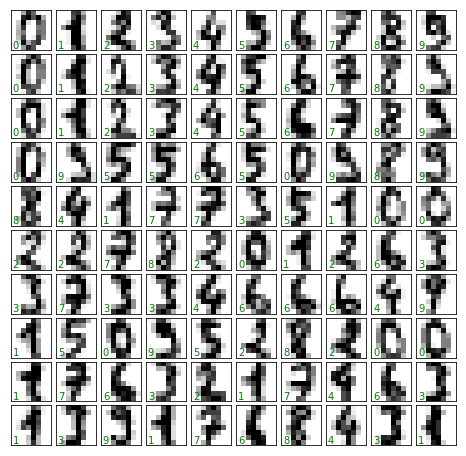

In [1]:
%matplotlib inline
#加载并可视化手写数字
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

fig, axes = plt.subplots(10,10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')
plt.show();

## 2. 构造分类器，进行训练

方式一：使用`sklearn`的`MLPClassifier`

In [2]:
#分类
from sklearn.model_selection  import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,random_state=0)
model = MLPClassifier()
_ = model.fit(x_train, y_train)
y_model = model.predict(x_test)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

方式二：调用numpy实现的全连接网络([network1-2](network1-2.py)).

In [ ]:
from network1-2 import network
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

方式三：调用keras实现的卷积神经网络([keras_cnn](keras_cnn.py))

In [ ]:
from keras_cnn import getModel
model = getModel()
batch_size = 100
epochs = 8
model.fit(train_X, train_y,
         batch_size=batch_size,
         epochs=epochs)

## 3. 模型评估

### 精度

In [3]:
print('测试精度为：%.5f'%accuracy_score(y_model, y_test))

测试精度为：0.96444


### 混淆矩阵

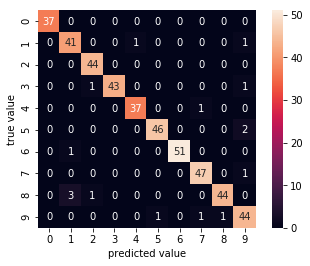

In [4]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
#是否为正方形，方格中是否显示数字
sns.heatmap(mat, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

### 结果可视化分析

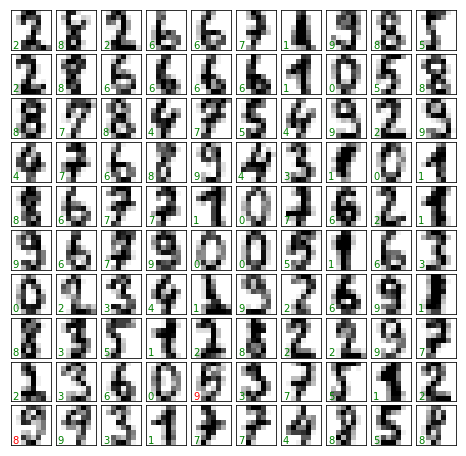

In [5]:
#另外一种显示模型特征的直观方式是将样本画出来，然后将预测标签放在左下角，用绿色表示预测正确，用红色表示预测错误的值
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[],'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = x_test.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),transform=ax.transAxes,
            color='green' if (y_test[i] == y_model[i]) else 'red')
_;